In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.misc import factorial as sfactorial
from copy import copy
from time import time
%matplotlib inline

# Fibonacci Sequences and More Loops

I would be remiss if I were to teach a class on programming in mathematics and not present the Fibonacci sequence.  Originally motivated by a desire to model population growth, the Fibonnaci sequence is given by the _ recurrence relation _ 

$$
p_{n} = p_{n-1} + p_{n-2}, ~ n\geq 2,
$$

where we start the recurrence relation with the _ intial conditions _ 

$$
p_{0}=p_{1}=1.  
$$

What this means is 

$$
p_{2} = p_{1} + p_{0} = 1 + 1 = 2,
$$

$$
p_{3} = p_{2} + p_{1} = 2 + 1 = 3,
$$

and so forth, thereby generating the classic sequence 

$$
1,1,2,3,5,8,13,21,34,\cdots
$$

So while we can readily understand how to generate the sequence term-by-term, we can ask the related question, given some arbitrary value of $n$, what is $p_{n}$?  At this point, you must acknowledge that a computer may come in handy.  To answer this question, we use the bit of code provided just below.   

In [2]:
def fibo_seq(n):
    if n>=2:
        p0=1
        p1=1
        for jj in range(0,n-1):
            p2=p0+p1
            p0=p1
            p1=p2            
        return p2
    else:
        return 1

In [3]:
def fibo_seq_array(n):
    pn = np.ones(n+1, dtype=np.int64)
    if n>=2:
        for jj in range(2,n+1):
            pn[jj] = pn[jj-1] + pn[jj-2]
    return pn

In [4]:
fibo_seq_array(5)

array([1, 1, 2, 3, 5, 8], dtype=int64)

The key thing to take away from this is the bit of code 

`
p2=p1+p0
p0=p1
p1=p2
`

which is how we implement 

\begin{align}
p_{n} = & p_{n-1} + p_{n-2}\\
p_{n+1} = & p_{n} + p_{n-1}
\end{align}

where we write out two iterations of the recurrence relation in order to see how what are computed values, i.e. $p_{n}$ or `p2` becomes the next prior values in the next iteration.  

Running our code, we then get for $n=1000$,

In [6]:
print(fibo_seq(1000))

70330367711422815821835254877183549770181269836358732742604905087154537118196933579742249494562611733487750449241765991088186363265450223647106012053374121273867339111198139373125598767690091902245245323403501


In [7]:
print(fibo_seq(1001)/fibo_seq(1000))

1.618033988749895


which is an absurd number.  So, while we have an answer to our original question, we maybe do not have as useful of an answer as we would like.  

In order to get something a little more interesting then, we will actually solve the recurrence relation which generates the Fibonacci sequence.  This means we will find a function $\phi(x)$ such that

$$
p_{n} = \phi(n), ~ \phi(0)=\phi(1) = 1.
$$

To do this, we make a guess, or _ ansatz _ for the form of $\phi$.  The guess we make is

$$
p_{n} = \lambda^{n}, 
$$

where $\lambda$ is just some number.  If our guess represents a solution to our recurrence relation, then it must necessarily be the case that 

\begin{align}
\lambda^{n} = & \lambda^{n-1} + \lambda^{n-2}\\
\lambda^{n} = & \lambda^{n}\lambda^{-1} + \lambda^{n}\lambda^{-2}\\
\lambda^{n} = & \lambda^{n}\left(\lambda^{-1}+\lambda^{-2}\right)\\
1 = & \lambda^{-1} + \lambda^{-2}\\
\lambda^{2} = & \lambda + 1
\end{align}

and so we can find 

$$
\lambda_{\pm} = \frac{1}{2}\left(1\pm\sqrt{5}\right).
$$

On the one hand then, our guess has proven quite successful.  We wanted to find a number $\lambda$ which, when exponentiated, allowed us to solve the Fibonacci recurrence relation.  However, on the other hand, what is disconcerting is that we have not found just one answer, but two.  So which do we pick?  The answer is, effectively, both, so that we write

$$
p_{n} = c_{+}\lambda_{+}^{n} + c_{-}\lambda_{-}^{n}.
$$

Note, we make no assumptions yet about the constants $c_{\pm}$ aside from that they are just numbers, but keep in mind, they do not depend on $n$.  We have therefore solved for the dynamics, i.e. we know how $p_{n}$ changes from one value of $n$ to the other, so the lion's share of the work has been done.  However, it would still be nice to know what $c_{\pm}$ are.  To do this, we need to use the initial conditions $p_{0}=p_{1}=1$.  Setting $n=0$, we have

$$
p_{0} = c_{+} + c_{-} = 1
$$

which shows that $c_{-} = 1-c_{+}$, which means that we can now write our solution $p_{n}$ as 

$$
p_{n} = c_{+}\lambda_{+}^{n} + (1-c_{+})\lambda_{-}^{n}.
$$

What we see from this is that using one initial condition has reduced the number of unknown variables to just one.  Thus, to get the last unknown to disappear we use $p_{1}=1$, so that 

$$
p_{1} = c_{+}\lambda_{+} + (1-c_{+})\lambda_{-} = 1.
$$

_Problem_: What is $c_{+}$?

So fab, we now have an exact representation of $p_{n}$ for $n\geq 0$.  What can we do with it though that we couldn't really do with our code above, because just to be clear, all we've done in some sense is speed the code up since now we can just plug in a value $n$ and get an answer.  

To address this issue then, we now suppose that $n\gg 1$, or in other words, we suppose that $n$ is really, really large.  How large is in the eye of the beholder in some sense. But the point here is the following.  We can readily show that

$$
\left|\lambda_{+}\right| > 1, ~ \left|\lambda_{-} \right|<1
$$

Thus, for $n\gg 1$, we see that 

$$
p_{n} \approx c_{+}\lambda^{n}_{+}
$$

So, if we take a logarithm to both sides of this approximation, we get that

$$
\log p_{n} \approx \log c_{+} + n \log \lambda_{+}
$$

and this is an equation of the form $y = mx + b$ where

$$
y = \log p_{n}, ~ m = \log \lambda_{+}, ~ x = n, ~ b = \log c_{+}.
$$

What this all means is that we are making a kind of prediction.  We are saying that if $n$ gets large enough, and we plot $\log p_{n}$ against $n$, the equation should follow that of a straight line with slope $\log \lambda_{+}$.  How can we test that?  Well, we write more code of course.  

In this case, we need to think about how to use NumPy arrays to store information as we iterate.  Thus, we might modify the code above by using 

In [8]:
def fibo_seq(n):
    pn = np.ones(n+1)
    for jj in range(2,n+1):
            pn[jj]=pn[jj-1] + pn[jj-2]
    return pn

_Problem_: Using this code, generate plots which help you decide if the approximation and corresponding prediction we make above is reasonable.

In [10]:
def fibo_seq_plt(ntrunc,n):
    lpn = np.log10(fibo_seq(n))
    lpnt = lpn[ntrunc:]
    nvals = np.array(range(0,n+1))
    nvalt = nvals[ntrunc:]
    
    plt.plot(nvalt,lpnt)
    plt.xlabel('$n$')
    plt.ylabel('$\log_{10}p_{n}$')
    
    print("Predicted slope of semi-log plot is: %1.15f" % np.log10((1.+np.sqrt(5.))/2.))
    
    slope = (lpnt[1]-lpnt[0])
    
    print("Approximate slope from numerics is: %1.15f" % slope)

Predicted slope of semi-log plot is: 0.208987640249979
Approximate slope from numerics is: 0.210853365314893


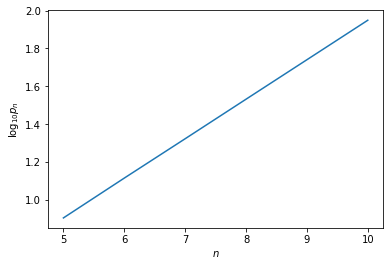

In [11]:
fibo_seq_plt(5,10)

Predicted slope of semi-log plot is: 0.208987640249979
Approximate slope from numerics is: 0.208972485450337


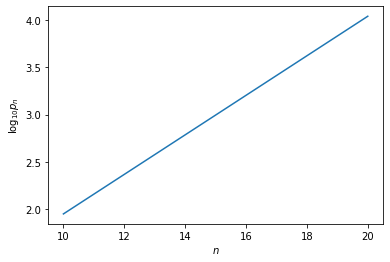

In [12]:
fibo_seq_plt(10,20)

## The 3n+1 Sequence

So this is a bit of a mathematical curiosity, but it makes for a good programming project, and it happens to connect to a famous unsolved problem.  It goes like this

- Start with a positive integer n.

- If n = 1, stop.

- If n is even, replace it with n/2.

- If n is odd, replace it with 3n+1.

So if we started with $n=3$, then we would generate the sequence

$$
3, 10, 5, 16, 8, 4, 2, 1
$$

Now, using the code block below, write a program which takes in a positive integer $n$ and then plots the particular sequence the above rules would generate.  To do this, you will need to make use of the command

`
arr = np.append(arr,val)
`

which appends to the end of the array `arr` the value `val`.  Also, don't forget about your friend the mod function `%`.

In [ ]:
def plot_threenp1(n):
    n0 = n
    tnp1 = np.array([n])
    while n > 1:
        if #you put code here:
            n = #you put code here
        else :
            n = #you put code here
        tnp1 = np.append(tnp1,n)
    
    nvals = range(1,tnp1.size+1)
    plt.plot(nvals,tnp1)
    plt.xlabel('n')
    plt.title('3n+1 Sequence for Starting Integer: %d' %n0)

In [ ]:
plot_threenp1(3)

The unsolved mathematical problem is whether this code can run forever i.e. it is unknown whether there are any starting values $n$ which generate a sequence which goes on for forever.  Thus, an interesting associated quantity we would want to know is how many terms a given value of $n$ generates via the $3n+1$ sequence.  We call this number $L(n)$.  For example then, using our example of $n=3$ above, we have that 

$$
L(3)  = 8
$$

So, modifying the code you just wrote, figure out how to find $L(n)$ and then generate a plot of $L(n)$ for $1\leq n \leq 1000$.  Discuss any trends you observe.  

In [ ]:
def Ln_maker(n):
    #add some code 
    return Ln

def Ln_plotter()

# Prime Numbers

So, for a given natural number $n\in \mathbb{N}$, we say it is prime if its only divisors are $1$ and itself.  Otherwise, we say the number is composite.  Likewise, we have the _Fundamental Theorem of Arithmetic_, which says that for any $n\in\mathbb{N}$, $n$ has a prime factorization so that 
$$
n = p_{1}^{k_{1}}\cdots p_{j}^{k_{j}}, ~ k_{j}\in \mathbb{N}
$$
where each $p_{l}$ is prime and the decomposition is unique modulo rearranging the order of the terms.  Thus, primes in this sense are the back bone of the natural numbers, building everything up from them.  Given that you get every natural number just by adding one to the prior one, it's not immediately obvious that primes should provide such fundamental structure to our foundation for counting.  Cool huh?!?

So, testing if a given natural number $n$ is prime is not a trivial task.  We can readily develop and 'obvious' algorithm, also called _trial division_, where

In [2]:
def trl_dvsn(n):
    tstr = "You have a prime"
    fstr = "You do not have a prime"
    isprime = True
    cnt = 2
    while isprime and cnt < n:
        if n%cnt == 0:
            isprime = False
        else:
            cnt += 1
    if isprime:
        print(tstr)
    else:
        print(fstr)

In [6]:
trl_dvsn(13)
trl_dvsn(15)
trl_dvsn(3787323477)

You have a prime
You do not have a prime
You do not have a prime


First, we need to reduce the set of numbers over which we search.  To wit prove

_Problem_: If $n$ is composite, show there is a prime factor $p_{j}$ such that $p_{j}\leq\sqrt{n}$.

_Problem_: If $n>6$ and $n$ is prime, show that there is some $k\in\mathbb{N}$ such that $n=6k+1$ or $n=6k+5$.

Using these two results, develop an algorithm which tests whether a natural number is prime.  How does your algorithm perform as you increase the value of $n$ that you are testing?  How would you even measure that?  How much better is your method compared to the simple method we first developed?  

In [1]:
def btr_trl_dvsn(n):
    tstr = "You have a prime"
    fstr = "You do not have a prime"
    isprime = True
    
    if n%2 == 0 or n%3 == 0 or n%5 == 0:
        if n!=2 and n!=3 and n!=5:
            isprime = False
    else:
        kmax = 0
        if n>=49 and n<121:
            kmax = int(np.floor((np.sqrt(n)-1.)/6.))
        elif n>=121:
            kmax = int(np.floor((np.sqrt(n)-5.)/6.))
        
        if kmax > 0:
            for kk in range(0,kmax):
                tstnmbr = 6*(kk+1)+1
                if n%tstnmbr # add code:
                    isprime # add code 
                    break
                else:
                    tstnmbr # add code
                    if tstnmbr <= nsq:
                        if n%tstnmbr# add code:
                            isprime # add code 
                            break
    
    if isprime:
        print(tstr)
    else:
        print(fstr)
        